In [1]:
import os
import pandas as pd

In [100]:
# series
# convert tuple to series
tup = ('AA', '2012-12-21', 100, 10.2)
s1 = pd.Series(tup)
print(s1)
print(s1.index)

# convert dict to series
dic = {'name':'IBM', 'date':'2010-09-09', 'shares':100, 'price':133}
s2 = pd.Series(dic)
print(s2)
print(s2.index)

# convert list to series
li = ['FB', '2015-10-01', 80, 55]
s3 = pd.Series(li, index = ['name', 'date', 'shares', 'price'])
print(s3)
print(s3.index)
type(s3.index)
pd.Series(s3.index)

print(s1.iloc[1]) # locate at row 1, same as s1[1]
print(s1[1])
print(s2.iloc[1]) # locate at row 1, same as s2[1]
print(s2[1])


print(s1.loc[1])  # locate at index 1, same as s1.iloc[1]
#print(s2.loc[2]) # error, no index 2 exists

print(s1[[3,1]])  # locate at row 3 and 1
print(s2[[3,1]])  # locate at row 3 and 1

print(s2['name']) # locate at index 'name'
print(s2[['name', 'date']]) # locate at index 'name' and 'date'

0            AA
1    2012-12-21
2           100
3          10.2
dtype: object
RangeIndex(start=0, stop=4, step=1)
date      2010-09-09
name             IBM
price            133
shares           100
dtype: object
Index([u'date', u'name', u'price', u'shares'], dtype='object')
name              FB
date      2015-10-01
shares            80
price             55
dtype: object
Index([u'name', u'date', u'shares', u'price'], dtype='object')
2012-12-21
2012-12-21
IBM
IBM
2012-12-21
3          10.2
1    2012-12-21
dtype: object
shares    100
name      IBM
dtype: object
IBM
name           IBM
date    2010-09-09
dtype: object


In [2]:
s1 = pd.Series([1,2,3,4], index=list("ABCD"))
s2 = pd.Series([5,6,7,8], index=list("CDEF"))

In [3]:
s1

A    1
B    2
C    3
D    4
dtype: int64

In [4]:
type(s1)

pandas.core.series.Series

In [5]:
df = pd.DataFrame({'a':s1, 'b':s2})
df

,a,b
A,1.0,NaN
B,2.0,NaN
C,3.0,5.0
D,4.0,6.0
E,NaN,7.0
F,NaN,8.0


In [6]:
df.columns
# df.rows # error, no this attribute

Index([u'a', u'b'], dtype='object')

In [7]:
df = pd.DataFrame([s1,s2])

In [8]:
df

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,NaN,NaN
1,NaN,NaN,5.0,6.0,7.0,8.0


In [9]:
df.fillna(0)

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,0.0,0.0
1,0.0,0.0,5.0,6.0,7.0,8.0


In [10]:
df

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,NaN,NaN
1,NaN,NaN,5.0,6.0,7.0,8.0


In [11]:
df.dropna()

,A,B,C,D,E,F


In [12]:
df

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,NaN,NaN
1,NaN,NaN,5.0,6.0,7.0,8.0


In [13]:
df.dropna()

,A,B,C,D,E,F


In [14]:
# 1-d array: series
# 2-d array: dataframe
s = pd.Series([3,-5,7,4], index=['a','b','c','d'])

In [15]:
s.index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [16]:
data = {'country':['belgium','india','brazil'],
       'capital':['brussels','new delhi','brasilia'],
       'population':[1232311,4321245,3321355]}
df = pd.DataFrame(data, columns=['country','capital','population'])

In [17]:
df

,country,capital,population
0,belgium,brussels,1232311
1,india,new delhi,4321245
2,brazil,brasilia,3321355


In [18]:
pd.DataFrame(data)
#df.loc[0]
#df.loc[1]

,capital,country,population
0,brussels,belgium,1232311
1,new delhi,india,4321245
2,brasilia,brazil,3321355


In [19]:
df.loc[0]

country        belgium
capital       brussels
population     1232311
Name: 0, dtype: object

In [20]:
df['capital']

0     brussels
1    new delhi
2     brasilia
Name: capital, dtype: object

In [21]:
#help(pd.Series.loc)
#help(pd.Series.iloc)
df.head(n=2)

,country,capital,population
0,belgium,brussels,1232311
1,india,new delhi,4321245


In [22]:
df.iloc[1,1]
df.loc[1,'capital']
df.loc[:,'country']

0    belgium
1      india
2     brazil
Name: country, dtype: object

In [23]:
df[df['population']>4000000]

,country,capital,population
1,india,new delhi,4321245


In [24]:
##########################
## map, apply, applymap
## https://www.youtube.com/watch?v=P_q0tkYqvSk
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train.PassengerId += 10
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,11,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,12,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,13,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,14,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,15,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.iloc[1,:]
train.index

RangeIndex(start=0, stop=891, step=1)

In [27]:
train.index = train.PassengerId
train.index

Int64Index([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
            ...
            892, 893, 894, 895, 896, 897, 898, 899, 900, 901],
           dtype='int64', name=u'PassengerId', length=891)

In [28]:
# .loc is in terms of index, or label
# .iloc is in terms of integer position, 'i' means integer
#train.loc[1,:] --> error since index 1 doesn't exist
train.iloc[1,:]

PassengerId                                                   12
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 12, dtype: object

In [29]:
train = pd.read_csv('http://bit.ly/kaggletrain')
# .map is to apply the function to all values in the series
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})
train.loc[0:4, ['PassengerId', 'Sex', 'Sex_num']]

,PassengerId,Sex,Sex_num
0,1,male,1
1,2,female,0
2,3,female,0
3,4,female,0
4,5,male,1


In [30]:
train['Name_len'] = train.Name.map(len)
train.loc[0:4, ['PassengerId', 'Name', 'Name_len']]

,PassengerId,Name,Name_len
0,1,"Braund, Mr. Owen Harris",23
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,3,"Heikkinen, Miss. Laina",22
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,5,"Allen, Mr. William Henry",24


In [31]:
train['Name_first'] = train.Name.map(lambda nm: nm.split(',')[0])
train.loc[0:4, ['PassengerId', 'Name', 'Name_first']]

,PassengerId,Name,Name_first
0,1,"Braund, Mr. Owen Harris",Braund
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,3,"Heikkinen, Miss. Laina",Heikkinen
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,5,"Allen, Mr. William Henry",Allen


In [32]:
# .apply is to apply function to either all elements in a series,
# or all rows/columns in a dataframe
train['Name_len'] = train.Name.apply(len)
train['Age_2x'] = train.Age.apply(lambda x: x*2)
train[['Name_len','Age_2x']].head()

,Name_len,Age_2x
0,23,44.0
1,51,76.0
2,22,52.0
3,44,70.0
4,24,70.0


In [33]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [34]:
# .apply to dataframe
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max)
# axis=0 by default, apply function column by column
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)
# axis=1, apply row by row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head(5)

0      0
1    132
2     25
3    312
4    217
dtype: int64

In [35]:
# .applymap is to apply function to all elements in a dataframe
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head()
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(lambda x: x+2).head()

,beer_servings,spirit_servings,wine_servings
0,2,2,2
1,91,134,56
2,27,2,16
3,247,140,314
4,219,59,47


In [36]:
# https://www.youtube.com/watch?v=qy0fDqoMJx8
# .groupby
drinks.head()
drinks.beer_servings.mean() # drinks.beer_servings is series

106.16062176165804

In [37]:
drinks.head(n=3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [38]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [39]:
drinks.groupby('continent')['beer_servings','wine_servings'].mean()

,beer_servings,wine_servings
continent,,
Africa,61.471698,16.264151
Asia,37.045455,9.068182
Europe,193.777778,142.222222
North America,145.434783,24.521739
Oceania,89.687500,35.625000
South America,175.083333,62.416667


In [40]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [41]:
drinks[drinks.continent=='Asia'].beer_servings.mean()

37.04545454545455

In [42]:
drinks.groupby('continent').beer_servings.agg(['count','max','min','mean'])

,count,max,min,mean
continent,,,,
Africa,53,376,0,61.471698
Asia,44,247,0,37.045455
Europe,45,361,0,193.777778
North America,23,285,1,145.434783
Oceania,16,306,0,89.687500
South America,12,333,93,175.083333


In [43]:
# drinks.groupby('continent') is DataFrameGroupBy object
# drinks.groupby('continent').beer_servings is SeriesGroupBy object
# so the type of *GroupBy object support methods like min/max/count/agg etc.
drinks.groupby('continent').agg(['count','max','min','mean'])


beer_servings                      spirit_servings           \
                      count  max min        mean           count  max min   
continent                                                                   
Africa                   53  376   0   61.471698              53  152   0   
Asia                     44  247   0   37.045455              44  326   0   
Europe                   45  361   0  193.777778              45  373   0   
North America            23  285   1  145.434783              23  438  68   
Oceania                  16  306   0   89.687500              16  254   0   
South America            12  333  93  175.083333              12  302  25   

                          wine_servings                       \
                     mean         count  max min        mean   
continent                                                      
Africa          16.339623            53  233   0   16.264151   
Asia            60.840909            44  123   0    9.068182   
Europe         132.555556            45  370   0  142.222222   
North America  165.739130            23  100   1   24.521739   
Oceania         58.437500            16  212   0   35.625000   
South America  114.750000            12  221   1   62.416667   

              total_litres_of_pure_alcohol                       
                                     count   max  min      mean  
continent                                                        
Africa                                  53   9.1  0.0  3.007547  
Asia                                    44  11.5  0.0  2.170455  
Europe                                  45  14.4  0.0  8.617778  
North America                           23  11.9  2.2  5.995652  
Oceania                                 16  10.4  0.0  3.381250  
South America                           12   8.3  3.8  6.308333

In [44]:
%matplotlib inline

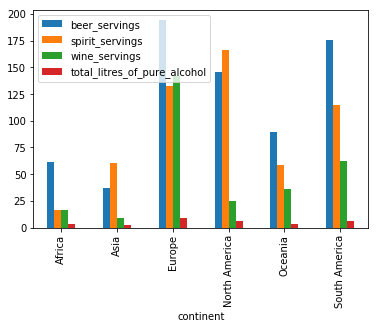

In [45]:
drinks.groupby('continent').mean().plot(kind='bar')

In [46]:
#
# https://www.youtube.com/watch?v=yCgJGsg0Xa4
# datetime
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [47]:
ufo.dtypes
print(type(ufo.Time)) # series, panda's series always has index
print(type(ufo.Time[0])) # str, the '0' here is the index
print(ufo.Time[0])

<class 'pandas.core.series.Series'>
<type 'str'>
6/1/1930 22:00


In [48]:
#help(ufo.Time.str.slice)
ufo.Time.str.slice(-5,-3) #
ufo.Time.str.slice(-5,-3).astype(int).head() # .astype is method of series

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [49]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [50]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [51]:
# datetime has many methods
#ufo.Time.dt.day
#ufo.Time.dt.hour
#ufo.Time.dt.minute
#ufo.Time.dt.week
#ufo.Time.dt.weekday
#ufo.Time.dt.weekday_name
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [52]:
ts = pd.to_datetime('1/1/2000')
ts

Timestamp('2000-01-01 00:00:00')

In [53]:
ufo.loc[ufo.Time >= ts,:].head()

,City,Colors Reported,Shape Reported,State,Time
15606,Bakersfield,NaN,NaN,CA,2000-01-01 00:01:00
15607,New York City,NaN,SPHERE,NY,2000-01-01 00:01:00
15608,Los Angeles,NaN,NaN,CA,2000-01-01 00:03:00
15609,San Diego,GREEN,LIGHT,CA,2000-01-01 00:23:00
15610,Laporte,NaN,OTHER,TX,2000-01-01 02:13:00


In [54]:
t_delta = ufo.Time.max()-ufo.Time.min()
t_delta

Timedelta('25781 days 01:59:00')

In [55]:
%matplotlib inline

In [56]:
ufo['Year'] = ufo.Time.dt.year

18241
18241


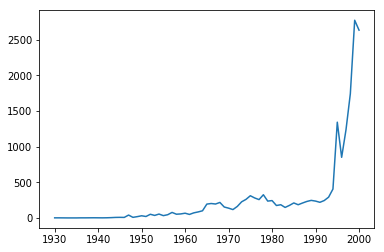

In [57]:
print(ufo.Year.count()) # series, count the number of elements
print(ufo.Year.value_counts().sum()) # series, sum the elements, not index
ufo.Year.value_counts().sort_values().head() # series, sort by elements/values
ufo.Year.value_counts().sort_index().head() # series, sort by index
ufo.Year.value_counts().sort_index().plot()

In [58]:
!dir
%history -n 1-3

 Volume in drive E is Data
 Volume Serial Number is BA5A-E744

 Directory of E:\space\mycodes-python\jupyter

07/21/2018  09:43 PM    <DIR>          .
07/21/2018  09:43 PM    <DIR>          ..
07/21/2018  09:43 PM    <DIR>          .ipynb_checkpoints
06/12/2018  10:27 PM             2,631 basics.ipynb
06/12/2018  10:42 PM               101 convert_2_py.txt
06/16/2018  09:06 AM             9,411 data.xlsx
06/14/2018  10:52 PM           128,488 pandas.ipynb
               4 File(s)        140,631 bytes
               3 Dir(s)  67,023,310,848 bytes free
   1:
import os
import pandas as pd
   2:
s1 = pd.Series([1,2,3,4], index=list("ABCD"))
s2 = pd.Series([5,6,7,8], index=list("CDEF"))
   3: s1


In [59]:
%qtconsole

In [60]:
#
# .read_table load tabular data - cells seprated by tab by default
pd.read_table('http://bit.ly/movieusers')
pd.read_table('http://bit.ly/movieusers', sep='|', header=None).head()
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)
users.head()
# .read_csv vs. .read_table, only different is the default sep
pd.read_csv('http://bit.ly/movieusers', sep='|', header=None).head()
pd.read_csv('http://bit.ly/movieusers', sep='|', header=None, names=user_cols).head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


           user_id        age
gender                       
F       481.406593  33.813187
M       468.167164  34.149254


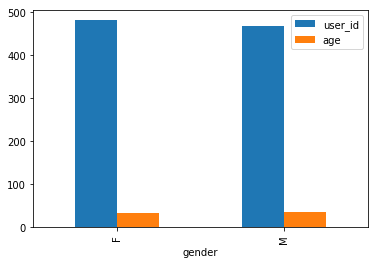

In [62]:
users.groupby('gender')['age'].mean()
print(users.groupby('gender')['user_id', 'age'].mean())
users.groupby('gender').mean().plot(kind='bar')